In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Select a dataset with at least 5 columns.
Perform the following in a notebook:
- Clean and filter the dataset.
- Apply at least 2 groupby operations with aggregations.
- Reshape the dataset at least once (pivot, melt, etc.).
- Create 3 visualizations from the cleaned dataset.
- Submit .ipynb and .html.

In [12]:
weekly_offense = pd.read_csv("weekly_team_stats_offense.csv")

weekly_offense = weekly_offense.dropna(subset=['team'])
weekly_offense = weekly_offense.dropna(subset=['total_off_points'])
weekly_offense['total_off_points'] = weekly_offense['total_off_points'].astype(int)
weekly_offense = weekly_offense[weekly_offense['week'] > 0]

In [13]:
weekly_offense.head()

,game_id,season,week,team,season_type,shotgun,no_huddle,qb_dropback,qb_scramble,total_off_yards,...,average_fourth_down_failed,average_rush_touchdown,average_pass_touchdown,average_safety,average_interception,average_fumble,average_fumble_lost,average_fumble_forced,average_fumble_not_forced,average_fumble_out_of_bounds
0,2012_01_SEA_ARI,2012,1,ARI,REG,31,0,38,1,258,...,0.000000,1.000000,1.000000,0.0,1.000000,2.000000,1.000000,2.000000,0.0,0.0
1,2012_02_ARI_NE,2012,2,ARI,REG,25,7,30,1,242,...,0.000000,1.000000,1.000000,0.0,0.500000,2.000000,1.500000,2.000000,0.0,0.0
2,2012_03_PHI_ARI,2012,3,ARI,REG,31,0,29,2,321,...,0.333333,0.666667,1.333333,0.0,0.333333,1.666667,1.333333,1.666667,0.0,0.0
3,2012_04_MIA_ARI,2012,4,ARI,REG,52,5,56,0,352,...,0.250000,0.500000,1.750000,0.0,0.750000,1.500000,1.000000,1.500000,0.0,0.0
4,2012_05_ARI_STL,2012,5,ARI,REG,56,7,59,1,334,...,0.600000,0.400000,1.400000,0.0,0.600000,1.400000,1.000000,1.400000,0.0,0.0


In [14]:
print(weekly_offense.columns)
print(len(weekly_offense.columns))

Index(['game_id', 'season', 'week', 'team', 'season_type', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_scramble', 'total_off_yards',
       ...
       'average_fourth_down_failed', 'average_rush_touchdown',
       'average_pass_touchdown', 'average_safety', 'average_interception',
       'average_fumble', 'average_fumble_lost', 'average_fumble_forced',
       'average_fumble_not_forced', 'average_fumble_out_of_bounds'],
      dtype='object', length=115)
115


In [15]:
team_season_offense = weekly_offense.groupby(['team', 'season']).agg({
    'total_off_yards': 'sum',
    'pass_attempts': 'sum',
    'complete_pass': 'sum',
    'passing_yards': "sum",
    'total_off_points':'sum',
    'third_down_converted' : 'sum',
    "third_down_failed" : 'sum',
    'interception' : 'sum',
    'win' : "max",
    "loss": "max",
    "tie": "max"
    
}).reset_index()
team_season_offense

,team,season,total_off_yards,pass_attempts,complete_pass,passing_yards,total_off_points,third_down_converted,third_down_failed,interception,win,loss,tie
0,ARI,2012,4587,587,337,3383,233,58,172,21,5,11,0
1,ARI,2013,5831,552,363,4291,346,74,136,22,10,6,0
2,ARI,2014,5407,582,336,4072,295,93,143,14,11,6,0
3,ARI,2015,7376,625,401,5359,492,101,120,19,14,4,0
4,ARI,2016,6157,629,383,4425,399,87,127,17,7,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,WAS,2020,5799,628,415,4102,339,95,144,17,7,10,0
412,WAS,2021,5807,535,356,3746,331,87,137,15,7,10,0
413,WAS,2022,5926,538,344,3783,303,81,149,16,9,8,0
414,WAS,2023,5766,615,407,4174,334,77,139,21,4,13,0


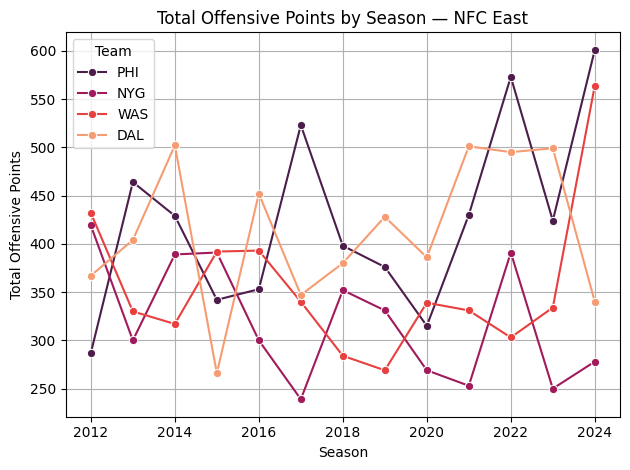

In [16]:
points_pivot = team_season_offense.pivot(index='team', columns='season', values='total_off_points')
nfc_east = points_pivot.loc[['PHI',"NYG","WAS","DAL"]]
nfc_east_reset = nfc_east.reset_index().melt(
    id_vars='team', 
    var_name='season', 
    value_name='total_points'
)

sns.lineplot(
    data=nfc_east_reset,
    x='season',
    y='total_points',
    hue='team',
    palette = "rocket",
    marker='o'
)

plt.title('Total Offensive Points by Season — NFC East')
plt.xlabel('Season')
plt.ylabel('Total Offensive Points')
plt.legend(title='Team')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
season_totals = weekly_offense.groupby('season').agg({
    'total_off_yards': 'sum',
    'pass_attempts': 'sum',
    'complete_pass': 'sum',
    'passing_yards': "sum",
    'third_down_converted' : 'sum',
    "third_down_failed" : 'sum',
    'interception' : 'sum',
    
}).reset_index()

season_totals

,season,total_off_yards,pass_attempts,complete_pass,passing_yards,third_down_converted,third_down_failed,interception
0,2012,193222,17951,11227,131045,2701,4345,477
1,2013,194639,18256,11508,134235,2774,4437,512
2,2014,192850,18058,11621,133841,2841,4221,469
3,2015,195242,18561,11948,137568,2758,4350,452
4,2016,194124,18578,11984,136465,2783,4202,433
5,2017,185565,17649,11244,127706,2732,4317,427
6,2018,195061,17783,11807,134580,2607,4040,427
7,2019,194308,18060,11736,133868,2663,4110,416
8,2020,200599,18491,12323,136907,2840,3950,415
9,2021,203488,18954,12605,138718,2922,4284,448


In [18]:
season_totals['total_third_downs'] = season_totals['third_down_converted'] + season_totals['third_down_failed']
season_totals['ave_third_down_comp'] = season_totals['third_down_converted'] / season_totals['total_third_downs']

season_totals

,season,total_off_yards,pass_attempts,complete_pass,passing_yards,third_down_converted,third_down_failed,interception,total_third_downs,ave_third_down_comp
0,2012,193222,17951,11227,131045,2701,4345,477,7046,0.383338
1,2013,194639,18256,11508,134235,2774,4437,512,7211,0.384690
2,2014,192850,18058,11621,133841,2841,4221,469,7062,0.402294
3,2015,195242,18561,11948,137568,2758,4350,452,7108,0.388014
4,2016,194124,18578,11984,136465,2783,4202,433,6985,0.398425
5,2017,185565,17649,11244,127706,2732,4317,427,7049,0.387573
6,2018,195061,17783,11807,134580,2607,4040,427,6647,0.392207
7,2019,194308,18060,11736,133868,2663,4110,416,6773,0.393179
8,2020,200599,18491,12323,136907,2840,3950,415,6790,0.418262
9,2021,203488,18954,12605,138718,2922,4284,448,7206,0.405495


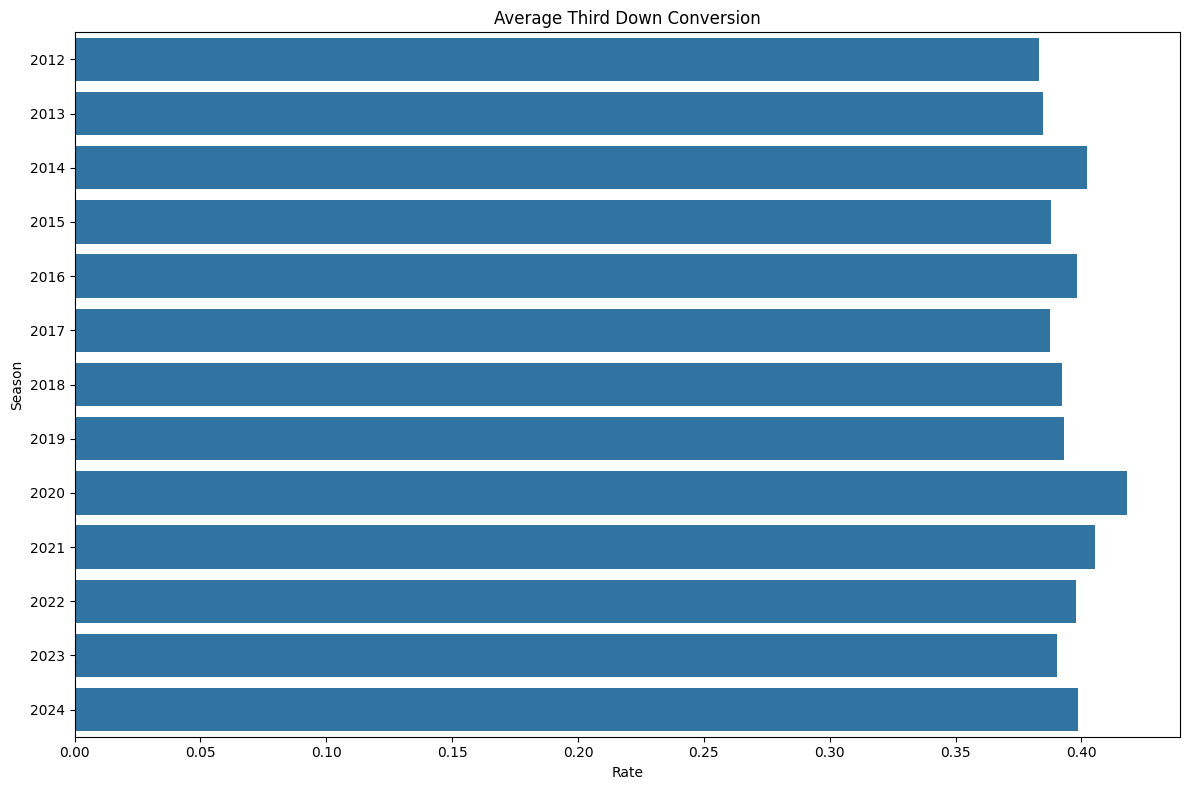

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=season_totals,
    x='ave_third_down_comp',
    y='season',
    orient='h'
)
plt.title('Average Third Down Conversion')
plt.xlabel('Rate')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

In [26]:
import altair as alt

scatter = alt.Chart(team_season_offense).mark_circle(size=80).encode(
    x=alt.X('win:Q', title='Wins'),
    y=alt.Y('loss:Q', title='Losses'),
    color=alt.Color('team:N', title='Team'),
    tooltip=['team', 'season', 'win', 'loss', 'tie']
).properties(
    width=600,
    height=400,
    title='Team Season Records: Wins vs Losses'
).interactive()  # enables zoom & hover
scatter

alt.Chart(...)